# Deep-Learning with Keras

#### Ugur URESIN, AI Engineer | Data Scientist
#### Mail: uresin.ugur@gmail.com

## Chapter 01. Mathematical Foundations

#### Data representations for neural networks

* Data is stored in multidimensional **Numpy arrays**, also called **tensors**.
* In general, all current machine-learning systems use tensors as their basic data structure.
* Tensors are fundamental to the field—so fundamental that Google’s **TensorFlow** was named after them.

#### Types of Tensors

* **SCALARS (0D Tensors):** Contains only one number is called a scalar.
* **VECTORS (1D Tensors):** An array of numbers is called a vector, or 1D tensor. A 1D tensor is said to have exactly one axis.
* **MATRICES (2D Tensors):** An array of vectors is a matrix, or 2D tensor. A matrix has two axes (often referred to rows and columns).
* **N-DIMENSINONAL TENSORS:** If you pack such matrices in a new array, you obtain a 3D tensor, which you can visually interpret as a cube of numbers. By packing 3D tensors in an array, you can create a 4D tensor, and so on. In deep learning, you’ll generally manipulate tensors that are 0D to 4D, although you may go up to 5D if you process video data.

In [10]:
import numpy as np

# 0D TENSOR (Scalar)
tensor0d = np.array(3.14)
print("Dimension of the 0D Tensor:", tensor0d.ndim)

# 1D TENSOR (Vector)
tensor1d = np.array([10, 20, 30, 40])
print("Dimension of the 1D Tensor:", tensor1d.ndim)

# 2D TENSOR (Matrix)
tensor2d = np.array([[11, 12, 13, 14],
                     [21, 22, 23, 24],
                     [31, 32, 33, 34]])
print("Dimension of the 2D Tensor:", tensor2d.ndim)

# 3D TENSOR
tensor3d = np.array([[[11, 12],
                      [21, 22]],
                     
                     [[41, 42],
                      [51, 52]]])
                     
print("Dimension of the 3D Tensor:", tensor3d.ndim)

Dimension of the 0D Tensor: 0
Dimension of the 1D Tensor: 1
Dimension of the 2D Tensor: 2
Dimension of the 3D Tensor: 3


#### Example dataset

In [11]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Image data dimensions:", train_images.ndim)
print("Image data shape:", train_images.shape)
print("Image data type:", train_images.dtype)

Image data dimensions: 3
Image data shape: (60000, 28, 28)
Image data type: uint8


* The dataset is a 3D tensor of 8-bit integers.
* More precisely, it’s an array of 60,000 matrices of 28 × 8 integers.
* Each such matrix is a grayscale image, with coefficients between 0 and 255.

#### Tensor Attributes

* **Number of axes (rank):** For instance, a 3D tensor has three axes, and a matrix has two axes. This is also called the tensor’s ndim in Python libraries such as Numpy.

* **Shape:** This is a tuple of integers that describes how many dimensions the tensor has along each axis. For instance, the previous matrix example has shape (3, 5), and the 3D tensor example has shape (3, 3, 5). A vector has a shape with a single element, such as (5,), whereas a scalar has an empty shape, ().

* **Data type (usually called dtype in Python libraries):** This is the type of the data contained in the tensor; for instance, a tensor’s type could be float32, uint8, float64, and so on. On rare occasions, you may see a char tensor. Note that string tensors don’t exist in Numpy (or in most other libraries), because tensors live in preallocated, contiguous memory segments: and strings, being variable length, would preclude the use of this implementation.

In [1]:
# Example
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
print("Training image dimensions:", train_images.shape)
print("Number of training labels:", len(train_labels))
print("Test image dimensions:", test_images.shape)
print("Number of test labels:", len(test_labels))

Training image dimensions: (60000, 28, 28)
Number of training labels: 60000
Test image dimensions: (10000, 28, 28)
Number of test labels: 10000


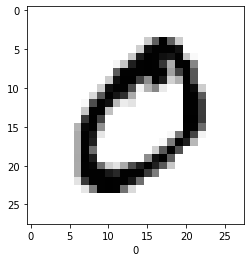

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# Let's look at a one image
IMG_INDEX = 1  # change to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(train_labels[IMG_INDEX])
plt.show()

#### Manipulating the Tensors

The following example selects digits #10 to #100 (#100 isn’t included) and puts
them in an array of shape (90, 28, 28):

In [4]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


It’s equivalent to this more detailed notation, which specifies a start index and stop index for the slice along each tensor axis.  
Note that : is equivalent to selecting the entire axis:

In [7]:
my_slice = train_images[10:100, :, :] #Equivalent to the previous example
my_slice.shape

(90, 28, 28)

In [9]:
my_slice = train_images[10:100, 0:28, 0:28] #Equivalent to the previous example
my_slice.shape

(90, 28, 28)

In general, you may select between any two indices along each tensor axis.  
For instance, in order to select 14 × 14 pixels in the bottom-right corner of all images, you do this:

In [14]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

It’s also possible to use negative indices.  
Much like negative indices in Python lists, they indicate a position relative to the end of the current axis.  
In order to crop the images to patches of 14 × 14 pixels centered in the middle, you do this:

In [15]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

#### Real-world examples of data tensors

The data you’ll manipulate will almost always fall into one of the following categories:
* **Vector data**  
    2D tensors of shape (samples, features)
* **Timeseries data or sequence data:**  
    3D tensors of shape (samples, timesteps, features)
* **Images—4D tensors of shape:**  
    (samples, height, width, channels)  
    (samples, channels, height, width)
* **Video—5D tensors of shape:**  
    (samples, frames, height, width, channels)  
    (samples, frames, channels, height, width)